# Plot difference joint pdfs
First, load some data:

In [1]:
# Define locations of data
cases = ('model 1', 'model 2')
files = {
    'model 1': 'data/e3sm-rrtmg.nc',
    'model 2': 'data/e3sm-rrtmgp.nc',
}

# Load into memory using the xarray library
from xarray import open_dataset
datasets = {case: open_dataset(files[case], decode_times=False) for case in cases}

We can see what's in here by printing out the contents of one of the datasets if we want, but it's usually easier to use ncdump by hand. Pick one variable to look at:

In [2]:
variable_name = 'FSNTC'
datasets[cases[0]][variable_name]

<xarray.DataArray 'FSNTC' (time: 1, ncol: 866)>
array([[   0.      ,    0.      ,    0.      , ...,  186.624329,  334.317596,
         362.75946 ]], dtype=float32)
Coordinates:
  * time     (time) float64 0.0
Dimensions without coordinates: ncol
Attributes:
    Sampling_Sequence:  rad_lwsw
    units:              W/m2
    long_name:          Clearsky net solar flux at top of model

Make a plot showing the *differences* in this variable between the two cases as a function of another variable, shown as a joint PDF:

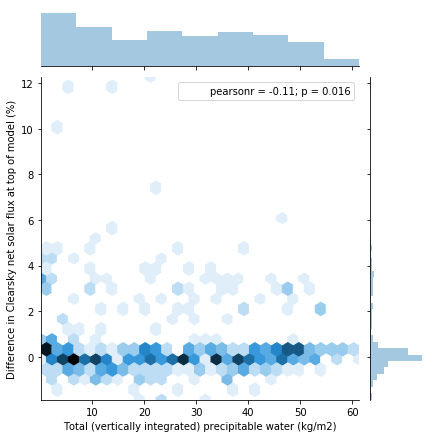

In [3]:
%matplotlib inline
from matplotlib import pyplot
import seaborn

# Define variables we want to work with
independent_variable = 'TMQ'
dependent_variable = 'FSNTC'

# Open a pyplot figure
figure = pyplot.figure()

# Read independent data
independent_data = datasets[cases[0]][independent_variable].squeeze()

# Read dependent data in so we can calculate differences
dependent_data = {case: datasets[case][dependent_variable].squeeze() for case in cases}

# Calculate (relative) differences
differences = 100.0 * (dependent_data[cases[1]] - dependent_data[cases[0]]) / ((dependent_data[cases[1]] + dependent_data[cases[0]]) / 2.0)

# Plot joint histogram of differences with independent variable
pl = seaborn.jointplot(independent_data.values.ravel(), differences.values.ravel(), kind='hex')
pl.set_axis_labels('%s (%s)'%(independent_data.long_name, independent_data.units),
                   'Difference in %s (%%)'%(dependent_data[cases[0]].long_name))